<h1 align="center">OpenMP part 2</h1> 

## Exercise 1:

Using your code 2D non linear convection equation from the `numba_pyccel_assignments`:
1. Parallelize the 2D non linear convection equation
2. Compare cpu time using different number of threads (Plot a figure of cpu time according to number of threads)

In [14]:
import numpy as np
import matplotlib as plt
import time

#fill the libraries import
from pyccel.epyccel import epyccel
from pyccel.decorators import types

In [15]:
!pip install matplotlib

In [16]:
%%file twoD_non_linear.py
# write your code here
import numpy as np

@types('float[:,:]','float[:,:]','float[:,:]','float[:,:]','int','float','float','float')
def solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy):

    u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
    row, col = u.shape
    
    #fill the update of u and v
    #$ omp parallel
    for n in range(nt):
        #pragma omp for collapse(2)
        for i in range (row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v[i,j]
        #pragma omp for collapse(2)
        for i in range(1, row-1):
            for j in range(1,col-1):
                u[i,j] = un[i,j] - (un[i,j] *( dt / dx) * (un[i,j] - un[i-1,j])) - (vn[i,j] * (dt / dy) * (un[i,j] - un[i,j-1]))
                v[i,j] = vn[i,j] - (un[i,j] * (dt / dx) * (vn[i,j] - vn[i-1,j])) -( vn[i,j] * (dt / dy) * (vn[i,j] - vn[i,j-1]))
    #$ omp end parallel
        
    return 0
if __name__ == "__main__" :
        
    ##variable declarations
    nx = 90
    ny = 90
    nt = 70
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)
    sigma = .2
    dt = sigma * dx


    u = np.zeros((ny, nx)) 
    v = np.zeros((ny, nx))
    un = np.empty((ny, nx))
    vn = np.empty((ny, nx)) 

    solve_2d_nonlinearconv_pure(u, un, v, vn, nt, dt, dx, dy)


Overwriting twoD_non_linear.py


In [20]:
!pyccel twoD_non_linear.py --language=c --openmp

### 12 threads

In [65]:
# start CPU timing
start_cpu = time.process_time()

#Execution
!export OMP_NUM_THREADS=12; ./twoD_non_linear

# CPU time
end_cpu = time.process_time()
cpu_time = end_cpu - start_cpu
print("CPU time  :", cpu_time)

CPU time  : 0.00958035100000032


### 8 threads

In [66]:
# start CPU timing
start_cpu = time.process_time()

#Execution
!export OMP_NUM_THREADS=8; ./twoD_non_linear

# CPU time
end_cpu = time.process_time()
cpu_time = end_cpu - start_cpu
print("CPU time  :", cpu_time)

CPU time  : 0.008366307000002848


### 4 threads

In [67]:
# start CPU timing
start_cpu = time.process_time()

#Execution
!export OMP_NUM_THREADS=4; ./twoD_non_linear

# CPU time
end_cpu = time.process_time()
cpu_time = end_cpu - start_cpu
print("CPU time  :", cpu_time)

CPU time  : 0.010328954000002


## Plot a figure of cpu time according to number of threads

In [68]:
Vals = np.arange(1,10,1)
Vals

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [69]:
values = np.zeros((len(Vals)))
values

for i in Vals :
    # start CPU timing
    start_cpu = time.process_time()

    #Execution
    a=i
    !export OMP_NUM_THREADS=a; ./twoD_non_linear

    # CPU time
    end_cpu = time.process_time()
    cpu_time = end_cpu - start_cpu
    print("CPU time  :", cpu_time)
    values[i-1] = cpu_time
    
values


libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.01051964499999869

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.010801440000001605

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.010025101000000092

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.010446396999999052

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.010304799000000031

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.009711182000000207

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.011594405000000307

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.009753116000002393

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.00955615700000223


array([0.01051964, 0.01080144, 0.0100251 , 0.0104464 , 0.0103048 ,
       0.00971118, 0.01159441, 0.00975312, 0.00955616])

(0.0, 0.02)

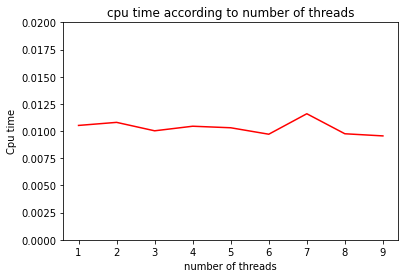

In [79]:
import matplotlib.pyplot as plt
plt.plot(Vals,values,'-',color ='r')
plt.title("cpu time according to number of threads")
plt.xlabel("number of threads")
plt.ylabel("Cpu time")
plt.ylim(0,0.02)


## Exercise 2:

Using your code Navier Stokes equation from the `numba_pyccel_assignments`:
1. Pyccelize the Navier Stokes equation (if it's not done).
2. Parallelize it using OpenMP.
3. Compare cpu time using different number of threads (Plot a figure of cpu time according to number of threads)

## Pure function

In [103]:
def build_up_b_pure(b, rho, dt, u, v, dx, dy):
    row, col = p.shape
        
        
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

def pressure_poisson_pure(p, dx, dy, b):
    pn = np.empty_like(p)
    pn = np.copy(p)
    #fill the update of p
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        
    return p

def cavity_flow_pure(nt, u, v, dt, nx, ny, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    pn = np.empty_like(p)
    pn = p.copy()
    
    #fill the update of u and v
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        b = build_up_b_pure(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson_pure(p, dx, dy, b)
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                        un[1:-1, 1:-1] * dt / dx *
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                        dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                        nu * (dt / dx**2 *
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        dt / dy**2 *
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                    un[1:-1, 1:-1] * dt / dx *
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                    vn[1:-1, 1:-1] * dt / dy *
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                    dt / dy**2 *
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    u[-1, :] = 1    # set velocity on cavity lid equal to 1
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
        
        
    return u, v, p

In [113]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

v = np.zeros((ny, nx))
un = np.ones((ny, nx))
vn = np.ones((ny, nx))
p = np.zeros((ny, nx))
pn = np.ones((ny, nx)) 
b = np.zeros((ny, nx))



In [114]:
def cavity_flow_pyc(b: 'float[:,:]',nt:'int', u: 'float[:,:]', v: 'float[:,:]', dt: 'float', nx: 'int', ny: 'int', dx: 'float', dy: 'float', p: 'float[:,:]', rho: 'int', nu:'float',un: 'float[:,:]',vn: 'float[:,:]',pn: 'float[:,:]'):
    
    row,col = u.shape
    
    #fill the update of u and v
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v [i,j]
                pn[i,j] = p [i,j]
                
        # Updqte b
        b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                    (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
        # Updqte P       
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0 
        # Updqte U   
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                        un[1:-1, 1:-1] * dt / dx *
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                        dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                        nu * (dt / dx**2 *
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        dt / dy**2 *
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
        # Updqte V
        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                    un[1:-1, 1:-1] * dt / dx *
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                    vn[1:-1, 1:-1] * dt / dy *
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                    dt / dy**2 *
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    u[-1, :] = 1    # set velocity on cavity lid equal to 1
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
        
        

In [115]:
cavity_flow_pyccel = epyccel(cavity_flow_pyc)

In [116]:
# pure Navier Stocks function
#Satrting time
start_cpu = time.process_time()
#Execution
cavity_flow_pure(nt, u, v, dt, nx, ny, dx, dy, p, rho, nu)
#CPU time
end_cpu = time.process_time()
cpu_time = end_cpu - start_cpu
print("CPU time  :", cpu_time)

CPU time  : 1.3683612880000027


In [117]:
# pure Navier Stocks function
#Satrting time
start_cpu = time.process_time()
#Execution
cavity_flow_pyccel(b,nt, u, v, dt, nx, ny, dx, dy, p, rho, nu, u, v, p)
#CPU time
end_cpu = time.process_time()
cpu_time = end_cpu - start_cpu
print("CPU time  :", cpu_time)

CPU time  : 0.021977251999999226


In [18]:
%%file Navier_Stocks_Openmp.py

def cavity_flow_pyc(b: 'float[:,:]',nt:'int', u: 'float[:,:]', v: 'float[:,:]', dt: 'float', nx: 'int', ny: 'int', dx: 'float', dy: 'float', p: 'float[:,:]', rho: 'int', nu:'float',un: 'float[:,:]',vn: 'float[:,:]',pn: 'float[:,:]'):
    row,col = u.shape
    #$ omp parallel
    for n in range(nt):
        for i in range(row):
            for j in range(col):
                un[i,j] = u[i,j]
                vn[i,j] = v [i,j]
                pn[i,j] = p [i,j]
                
        # Updqte b
        b[1:-1, 1:-1] = (rho * (1 / dt * ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                    (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
        # Updqte P       
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0 
        # Updqte U   
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                        un[1:-1, 1:-1] * dt / dx *
                    (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                    (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                        dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                        nu * (dt / dx**2 *
                    (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                        dt / dy**2 *
                    (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))
        # Updqte V
        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                    un[1:-1, 1:-1] * dt / dx *
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                    vn[1:-1, 1:-1] * dt / dy *
                    (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                    dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                    nu * (dt / dx**2 *
                    (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                    dt / dy**2 *
                    (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))
    #$ omp end parallel

    u[0, :]  = 0
    u[:, 0]  = 0
    u[:, -1] = 0
    u[-1, :] = 1    # set velocity on cavity lid equal to 1
    v[0, :]  = 0
    v[-1, :] = 0
    v[:, 0]  = 0
    v[:, -1] = 0
    
if __name__ == "__main__":
    
    import numpy as np

    nx = 41
    ny = 41
    nt = 500
    nit = 50
    c = 1
    dx = 2 / (nx - 1)
    dy = 2 / (ny - 1)

    rho = 1
    nu = .1
    dt = .001

    u = np.zeros((ny, nx))
    v = np.zeros((ny, nx))
    un = np.ones((ny, nx))
    vn = np.ones((ny, nx))
    p = np.zeros((ny, nx))
    pn = np.ones((ny, nx)) 
    b = np.zeros((ny, nx))
    
    cavity_flow_pyc(b,nt, u, v, dt, nx, ny, dx, dy, p, rho, nu,un,vn,pn)  

Writing Navier_Stocks_Openmp.py


In [119]:
!pyccel Navier_Stocks_Openmp.py --language=c --openmp

## 12 threads

In [122]:
# start CPU timing
start_cpu = time.process_time()

#Execution
!export OMP_NUM_THREADS=12; ./Navier_Stocks_Openmp

# CPU time
end_cpu = time.process_time()
cpu_time = end_cpu - start_cpu
print("CPU time  :", cpu_time)

CPU time  : 0.011582235000002328


## 8 threads

In [123]:
# start CPU timing
start_cpu = time.process_time()

#Execution
!export OMP_NUM_THREADS=8; ./Navier_Stocks_Openmp

# CPU time
end_cpu = time.process_time()
cpu_time = end_cpu - start_cpu
print("CPU time  :", cpu_time)

CPU time  : 0.010445012999998227


##  4 threads

In [124]:
# start CPU timing
start_cpu = time.process_time()

#Execution
!export OMP_NUM_THREADS=4; ./Navier_Stocks_Openmp

# CPU time
end_cpu = time.process_time()
cpu_time = end_cpu - start_cpu
print("CPU time  :", cpu_time)

CPU time  : 0.011524328000000139


## Plot a figure of cpu time according to number of threads

In [125]:
Vals2 = np.arange(1,10,1)
Vals2

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [126]:
values = np.zeros((len(Vals)))
values

for i in Vals :
    # start CPU timing
    start_cpu = time.process_time()

    #Execution
    a=i
    !export OMP_NUM_THREADS=a; ./Navier_Stocks_Openmp

    # CPU time
    end_cpu = time.process_time()
    cpu_time = end_cpu - start_cpu
    print("CPU time  :", cpu_time)
    values[i-1] = cpu_time
    
values


libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.011168016999999253

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.011048290999998045

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.010575524000000058

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.012329731000001232

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.011308184000000665

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.009366597999999726

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.010185520000000281

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.00818354400000132

libgomp: Invalid value for environment variable OMP_NUM_THREADS
CPU time  : 0.009924870000002528


array([0.01116802, 0.01104829, 0.01057552, 0.01232973, 0.01130818,
       0.0093666 , 0.01018552, 0.00818354, 0.00992487])

(0.0, 0.02)

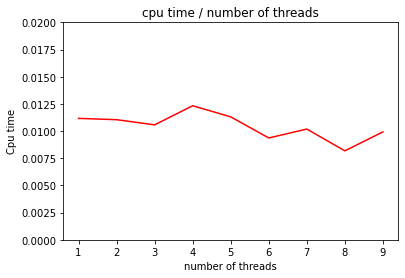

In [128]:
import matplotlib.pyplot as plt
plt.plot(Vals,values,'-',color ='r')
plt.title("cpu time / number of threads")
plt.xlabel("number of threads")
plt.ylabel("Cpu time")
plt.ylim(0,0.02)
